In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Gold.csv")

In [3]:
df.head()

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

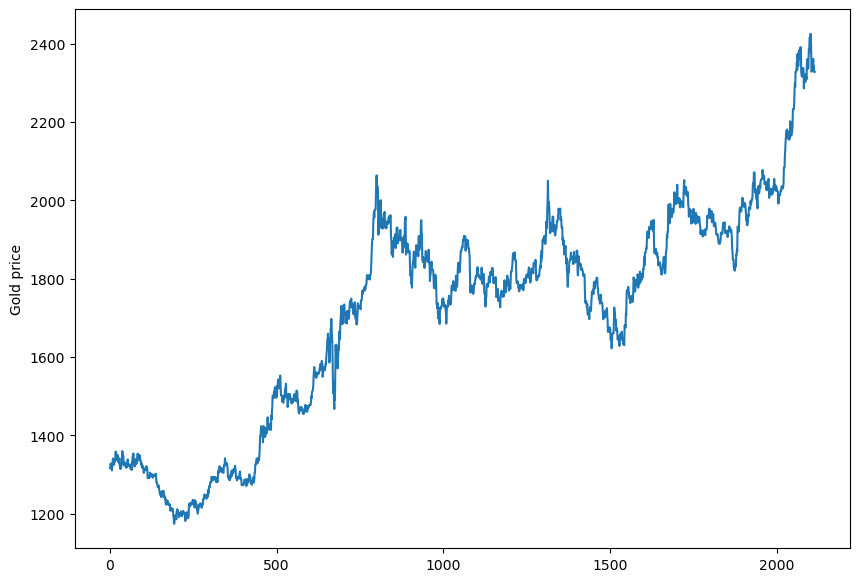

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Gold price")
plt.show()


In [6]:
t = .6
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.6066171985859644
c:  1184.3567134329842


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1954.153938
1,1954.760556
2,1955.367173
3,1955.973790
4,1956.580407
...,...
841,2464.319002
842,2464.925620
843,2465.532237
844,2466.138854


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 14.85355934139308
Mean Squared Error (MSE): 91766.79241382811
Root Mean Squared Error (RMSE): 302.93034251099397


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2467.35208844 2467.95870564 2468.56532284 2469.17194004 2469.77855724
 2470.38517444 2470.99179163 2471.59840883 2472.20502603 2472.81164323
 2473.41826043 2474.02487763 2474.63149483 2475.23811202 2475.84472922
 2476.45134642 2477.05796362 2477.66458082 2478.27119802 2478.87781522
 2479.48443241 2480.09104961 2480.69766681 2481.30428401 2481.91090121
 2482.51751841 2483.12413561 2483.7307528  2484.33737    2484.9439872
 2485.5506044  2486.1572216  2486.7638388  2487.370456   2487.97707319
 2488.58369039 2489.19030759 2489.79692479 2490.40354199 2491.01015919
 2491.61677639 2492.22339358 2492.83001078 2493.43662798 2494.04324518
 2494.64986238 2495.25647958 2495.86309678 2496.46971397 2497.07633117
 2497.68294837 2498.28956557 2498.89618277 2499.50279997 2500.10941717
 2500.71603436 2501.32265156 2501.92926876 2502.53588596 2503.14250316
 2503.74912036 2504.35573756 2504.96235475 2505.56897195 2506.17558915
 2506.78220635 2507.38882355 25

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

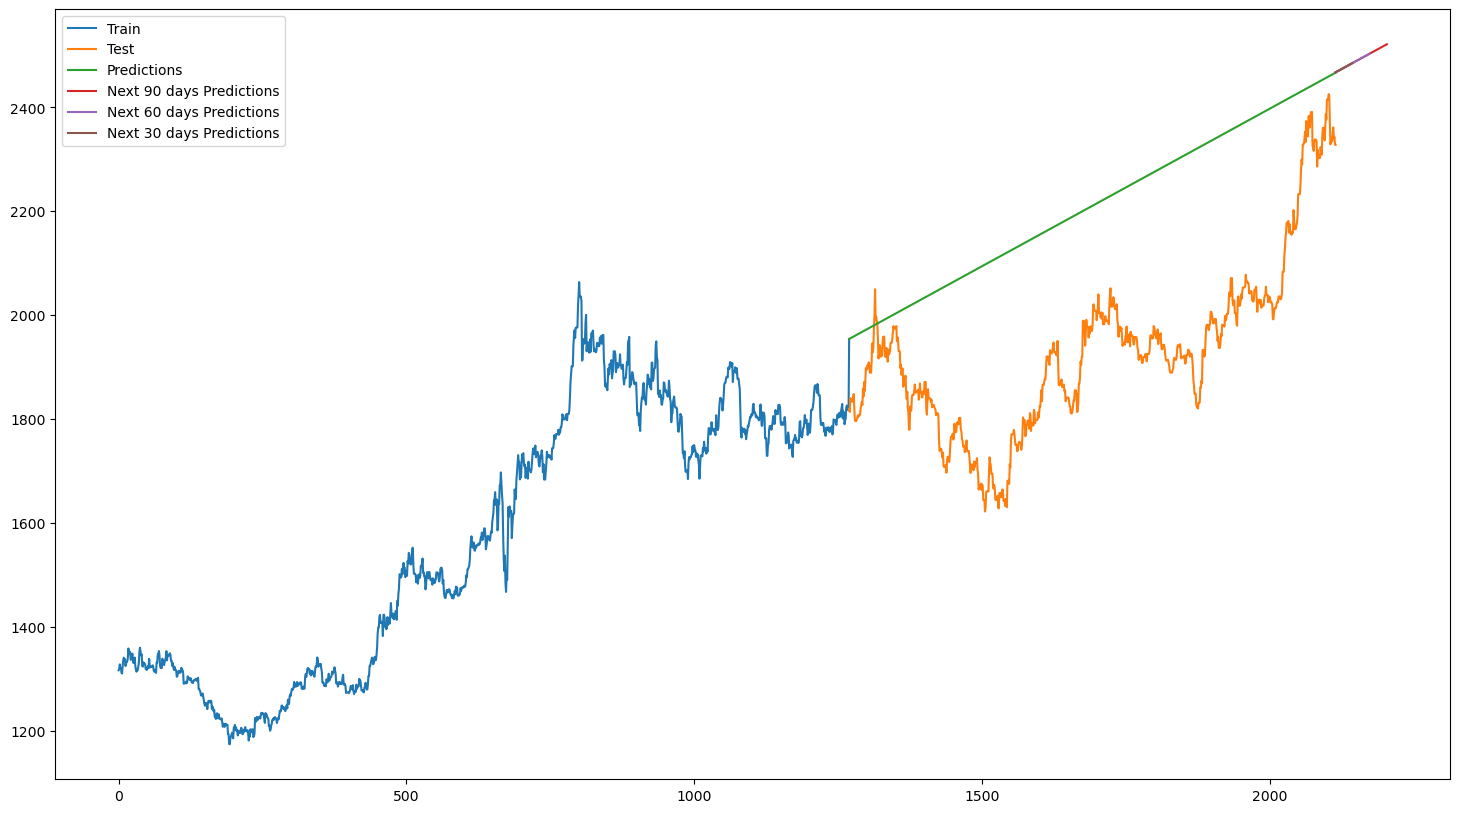

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()